<a href="https://colab.research.google.com/github/BrajanNieto/Mlearning/blob/main/01_DataDiscovery_MissingImpute_BrajanNieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Discovery - Ames housing dataset**

---


### Imputación de datos.

**Author:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

---


### <b>0. Libraries, Functions, etc. </b>

**Libraries**

In [23]:
#Libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 1. Lectura de Datos

In [12]:
url = 'https://raw.githubusercontent.com/BrajanNieto/Mlearning/main/AmesHousing.csv'
df = pd.read_csv(url)
print("Primeras filas del DataFrame:")
print(df.head(), "\n")

Primeras filas del DataFrame:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale C

In [13]:
print(f"Tamaño del DataFrame: {df.shape[0]} filas × {df.shape[1]} columnas\n")

Tamaño del DataFrame: 2930 filas × 82 columnas



In [14]:
print("Estadísticas descriptivas (numéricas):")
display(df.describe())
print()


Estadísticas descriptivas (numéricas):


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
print("Estadísticas descriptivas (categóricas):")
display(df.describe(include=['object', 'category']))
print()

Estadísticas descriptivas (categóricas):


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


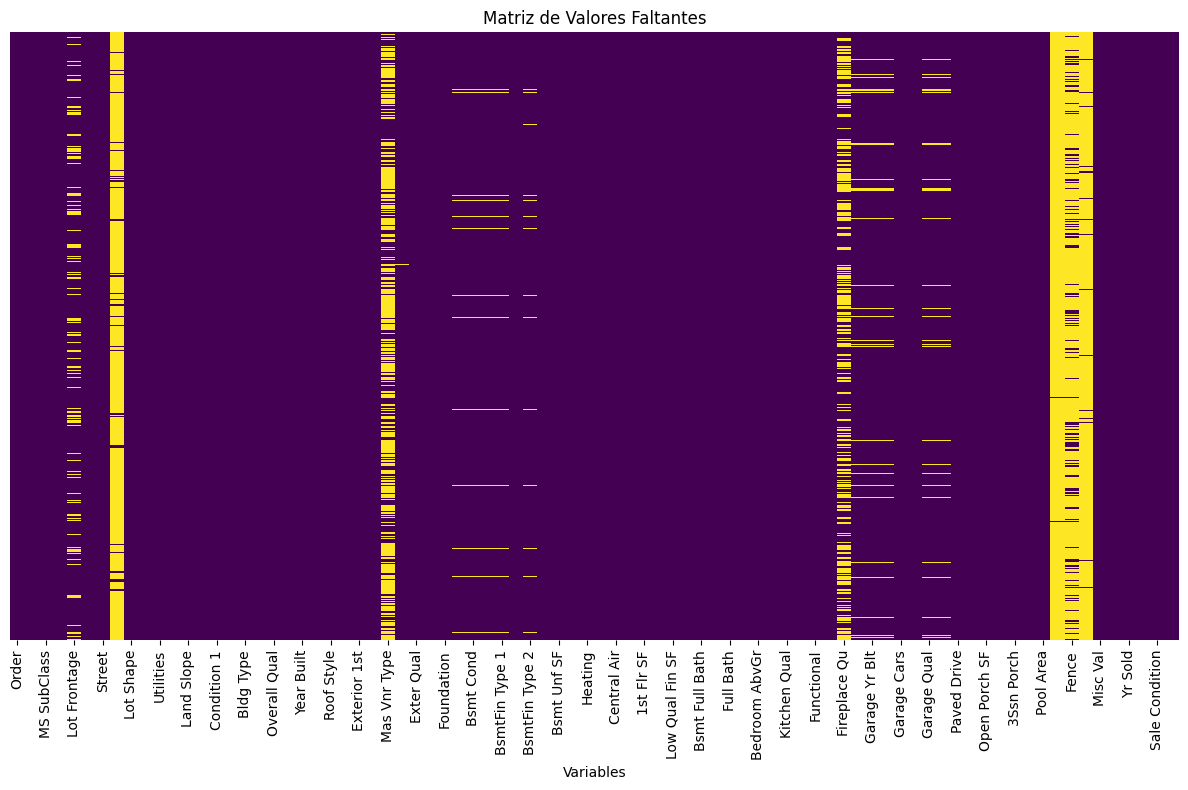

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Matriz de Valores Faltantes')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

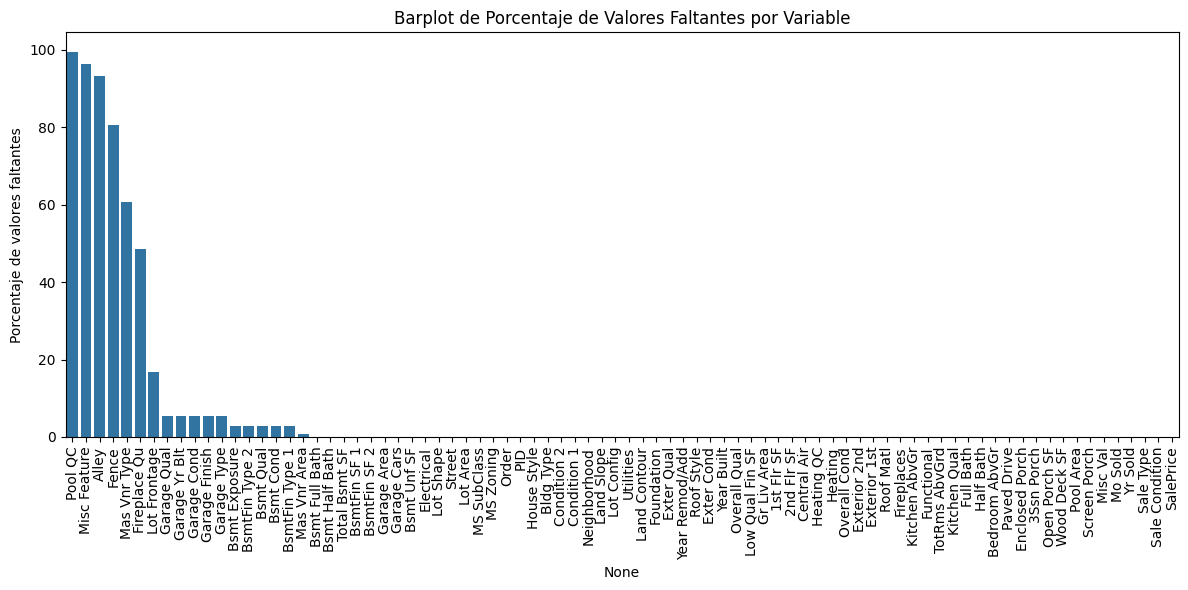

In [25]:
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_pct.index, y=missing_pct.values)
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Barplot de Porcentaje de Valores Faltantes por Variable')
plt.tight_layout()
plt.show()

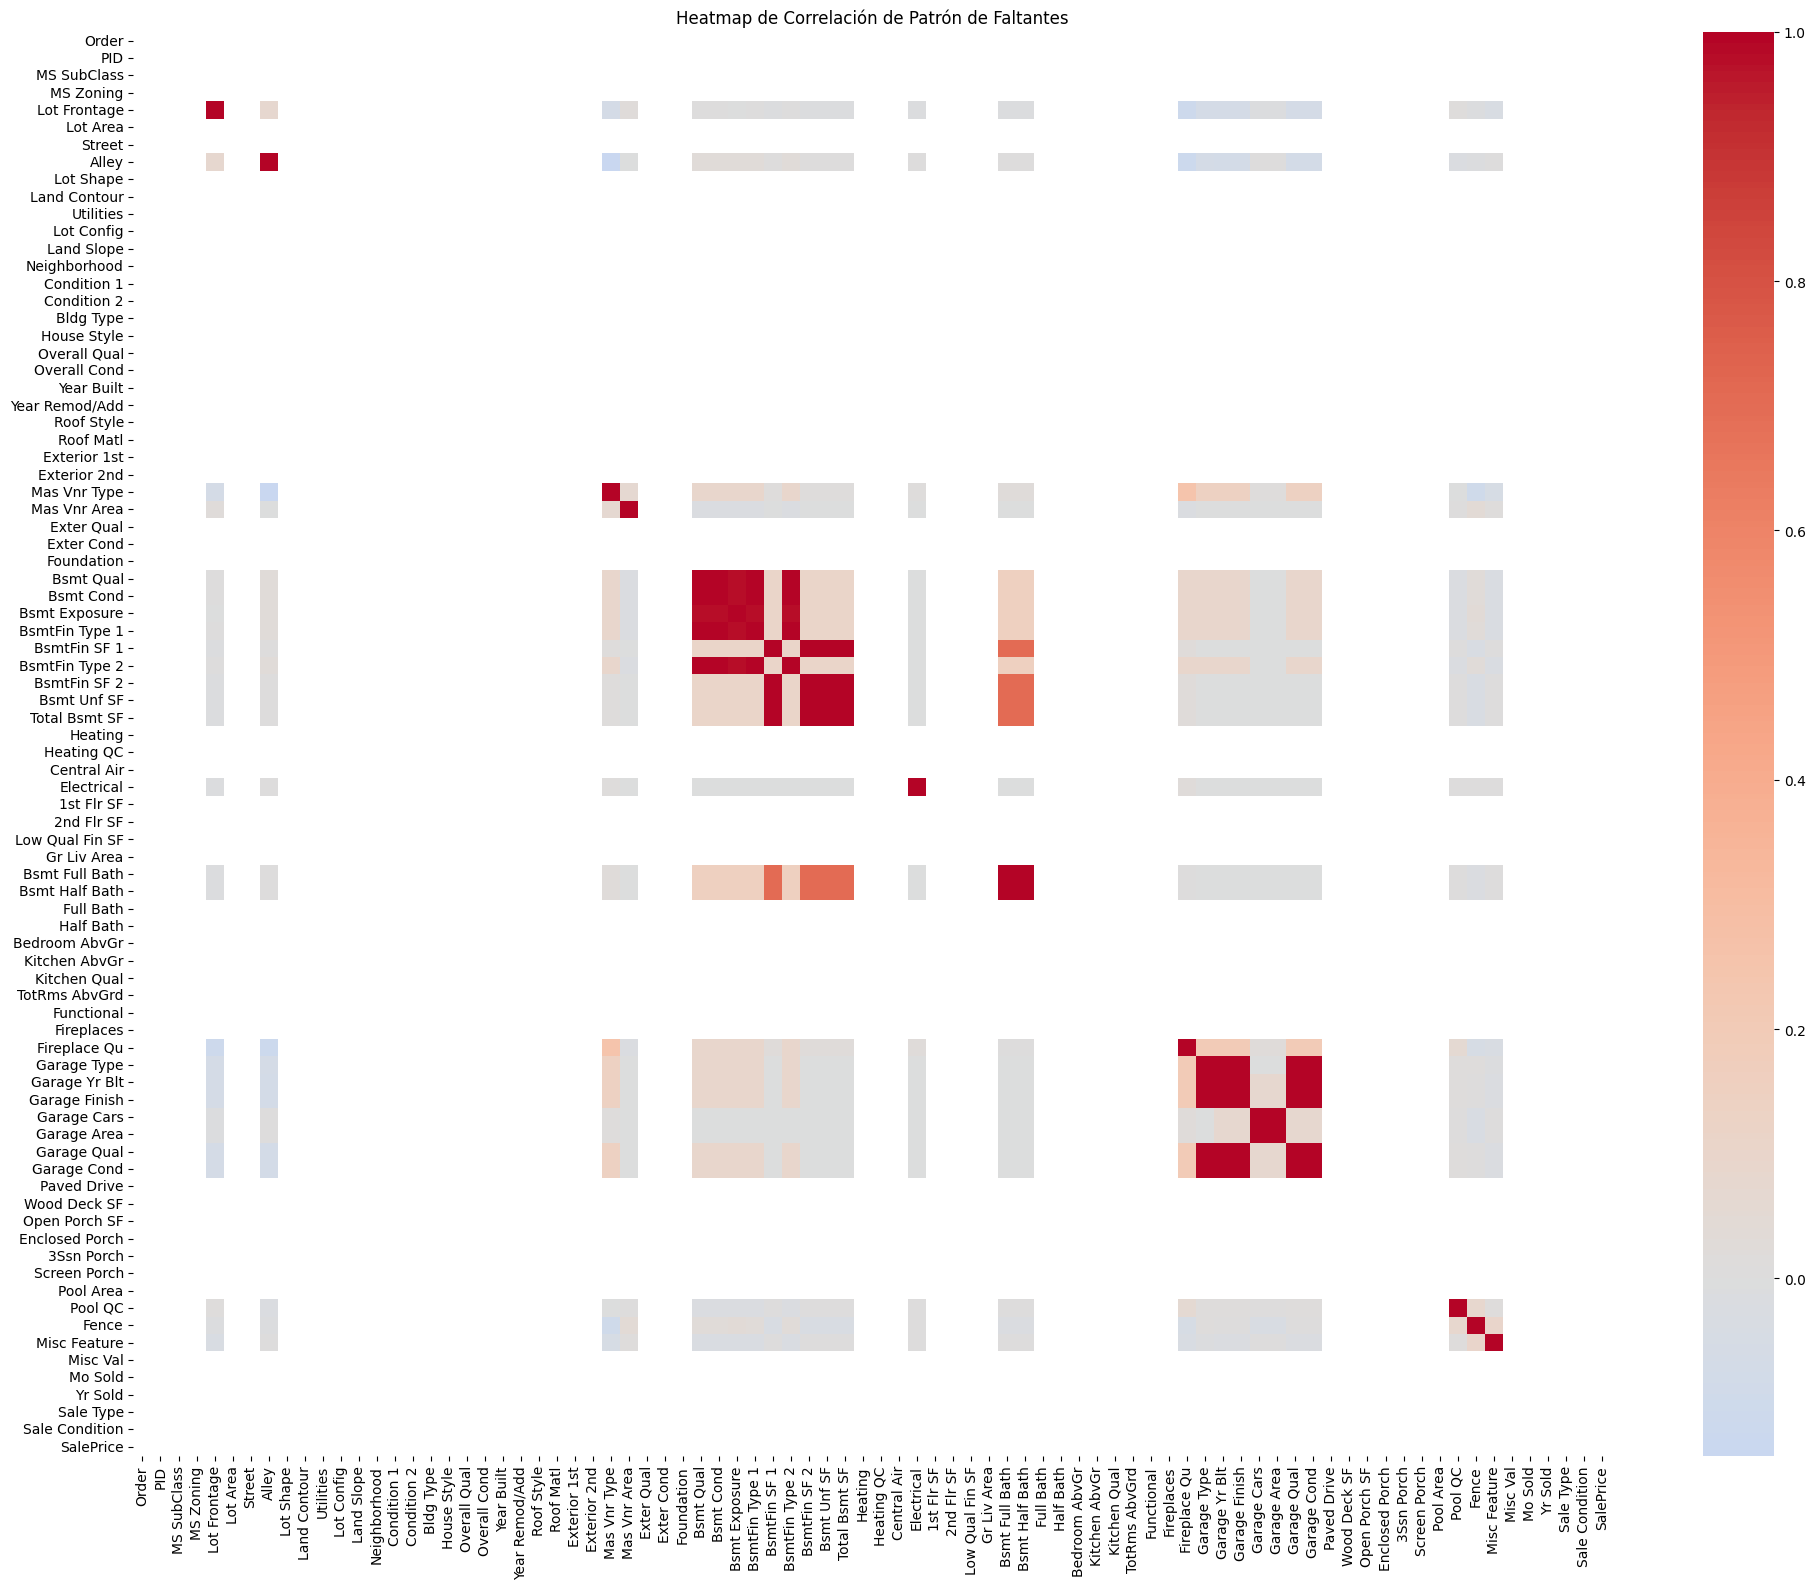

In [27]:
missing_corr = df.isnull().corr()

plt.figure(figsize=(20, 16))
sns.heatmap(missing_corr, cmap='coolwarm', center=0,
            xticklabels=True, yticklabels=True)
plt.title('Heatmap de Correlación de Patrón de Faltantes')
plt.tight_layout()
plt.show()

### Análisis de datos faltantes

Para poder imputar los valores faltantes aplicaremos estrategias agrupando las columnas según el porcentaje y dentro de estos grupos se analizara cada caso para analizar si es posible aplciar la misma estrategia para todos o se requiere distinto para cada uno.


*   **El primer grupo de variables presenta una tasa de missing extremadamente alta (≥ 80 %)**: Pool QC (99,6 %), Misc Feature (96,4 %), Alley (93,2 %) y Fence (80,5 %), lo que sugiere que estas columnas aportan muy poca información útil o podrían descartarse.

*   **En torno al 50–60 % de faltantes están variables relacionadas con acabados y características secundarias (Mas Vnr Type, Fireplace Qu)**, donde conviene imputar con estrategias basadas en la frecuencia o introducir la categoría “Ausente”.

*   **Un bloque intermedio (5–17 %)** engloba atributos de lotes y garajes (Lot Frontage, Garage Qual, Garage Yr Blt, etc.), con un volumen de datos suficiente para usar imputación numérica (media, KNN, autoencoders) y categórica (moda, model-based).

*   **Finalmente, varias variables de sótano y garaje tienen menos del 1 %** de valores faltantes, lo que permite una imputación sencilla sin afectar significativamente el análisis.

In [ ]:
unique_counts = df.nunique()
null_counts   = df.isnull().sum()
summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_count': null_counts,
    'missing_pct': df.isnull().mean() * 100
}).sort_values(by='missing_count', ascending=False)
print("Valores únicos y faltantes por columna:")
display(summary)

Valores únicos y faltantes por columna:


,unique_values,missing_count,missing_pct
Pool QC,4,2917,99.556314
Misc Feature,5,2824,96.382253
Alley,2,2732,93.242321
Fence,4,2358,80.477816
Mas Vnr Type,4,1775,60.580205
...,...,...,...
Mo Sold,12,0,0.000000
Yr Sold,5,0,0.000000
Sale Type,10,0,0.000000
Sale Condition,6,0,0.000000


#### 1. Primer grupo:  de missing extremadamente alta (≥ 80 %)



*   Pool QC (99,6 %): Los valores ausentes en Pool QC se deben a que, cuando Pool Area = 0, simplemente no aplica evaluación de calidad, por lo que aparecen como NaN de forma intencional. Por ello se creara una categoría “No Pool” en Pool QC para distinguir claramente entre ausencia de piscina y calidades reales. Esto conservaea la señal de posesión de piscina y evitaremos descartar información útil.
*   Misc Feature (96,4 %): Los NaN en Misc Feature indican la ausencia de características extra, reflejada también en Misc Val = 0. Se imputará esos NaN con “No Misc” y mantendremos tanto Misc Feature (como categoría de feature existente) como Misc Val (que cuantifica su valor). Así se evita interpretar la ausencia como error y se aprovecha la información de valor cero en Misc Val.
*   Alley (93,2 %): La misma estrategia anterior en este caso los nulos son porque no tiene esta característica
*   Fence (80,5 %): La misma estrategia anterior en este caso los nulos son porque no tiene esta característica

En resumen las variables con más del 80 % de “missing” no son errores, sino indicadores de ausencia de la característica (piscina, feature, callejón o cerca). En lugar de descartarlas, lo más eficiente es: Imputar los NaN con una etiqueta “No XXXXX”  Así se conserva la señal de presencia/ausencia de cada atributo y se evita perder información valiosa durante el modelado.

Tambien antes de hacer el modelo se puede considerar (Opcionalmente) crear una variable binaria  (1 si existe, 0 si no).


In [ ]:
impute_map = {
    'Pool QC': 'No Pool',
    'Misc Feature': 'None',
    'Alley': 'No Alley',
    'Fence': 'No Fence'
}
df.fillna(value=impute_map, inplace=True)

for col, fill_value in impute_map.items():
    print(f"Distribución de '{col}':")
    print(df[col].value_counts(dropna=False).head(), "\n")

Distribución de 'Pool QC':
Pool QC
No Pool    2917
Ex            4
Gd            4
TA            3
Fa            2
Name: count, dtype: int64 

Distribución de 'Misc Feature':
Misc Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
Name: count, dtype: int64 

Distribución de 'Alley':
Alley
No Alley    2732
Grvl         120
Pave          78
Name: count, dtype: int64 

Distribución de 'Fence':
Fence
No Fence    2358
MnPrv        330
GdPrv        118
GdWo         112
MnWw          12
Name: count, dtype: int64 



In [ ]:
unique_counts = df.nunique()
null_counts   = df.isnull().sum()
summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_count': null_counts,
    'missing_pct': df.isnull().mean() * 100
}).sort_values(by='missing_count', ascending=False)
print("Valores únicos y faltantes por columna:")
display(summary)

Valores únicos y faltantes por columna:


,unique_values,missing_count,missing_pct
Mas Vnr Type,4,1775,60.580205
Fireplace Qu,5,1422,48.532423
Lot Frontage,128,490,16.723549
Garage Cond,5,159,5.426621
Garage Yr Blt,103,159,5.426621
...,...,...,...
Mo Sold,12,0,0.000000
Yr Sold,5,0,0.000000
Sale Type,10,0,0.000000
Sale Condition,6,0,0.000000
